# Project -  Hypothesis Testing using Textual Analysis

**Background**: Hypothesis testing allows us to determine answers to various practical questions. It allows us to calculate the probability that whether random chance is actually responsible for certain outcome or the outcome is the result of a process which can be identified. Every process has some inherent amount of randomness that we can't measure and understanding the role of chance helps us reach a conclusion that's more likely to be correct.

**Aim and Goal**: In this project we will carry out textual analysis and try to confirm or reject the hypothesis that **Quiz Shows on popular television follow a set pattern of questions which can be identified**. For the purpose of textual analysis, we have selected **Jeopardy** which is a popular TV show in the US where participants answer questions to win money. We will try to confirm or reject our hypothesis using the dataset containing 20000 rows from the beginning of a full dataset of Jeopardy questions. We will consider three cases to help identify a test statistic which can identify repetitive patterns:
1. **Answers in Questions**: Based on the assumption that specific words in questions are indicators of answers.
2. **Recycled Questions**: Based on the assumption that questions from earlier shows are repeated in later shows.
3. **High Value Questions**: Based on the assumption that questions with high money value contain specific words or are repeated.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Setting pandas display options for large data
pd.options.display.max_rows = 200
pd.options.display.max_columns = 150

In [2]:
jeopardy = pd.read_csv("jeopardy.csv")

jeopardy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19999 entries, 0 to 19998
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Show Number  19999 non-null  int64 
 1    Air Date    19999 non-null  object
 2    Round       19999 non-null  object
 3    Category    19999 non-null  object
 4    Value       19999 non-null  object
 5    Question    19999 non-null  object
 6    Answer      19999 non-null  object
dtypes: int64(1), object(6)
memory usage: 1.1+ MB


In [3]:
jeopardy.head()

,Show Number,Air Date,Round,Category,Value,Question,Answer
0,4680,2004-12-31,Jeopardy!,HISTORY,$200,"For the last 8 years of his life, Galileo was ...",Copernicus
1,4680,2004-12-31,Jeopardy!,ESPN's TOP 10 ALL-TIME ATHLETES,$200,No. 2: 1912 Olympian; football star at Carlisl...,Jim Thorpe
2,4680,2004-12-31,Jeopardy!,EVERYBODY TALKS ABOUT IT...,$200,The city of Yuma in this state has a record av...,Arizona
3,4680,2004-12-31,Jeopardy!,THE COMPANY LINE,$200,"In 1963, live on ""The Art Linkletter Show"", th...",McDonald's
4,4680,2004-12-31,Jeopardy!,EPITAPHS & TRIBUTES,$200,"Signer of the Dec. of Indep., framer of the Co...",John Adams


### Cleaning and Formatting Data

First of all, we will clean and format data:
- Remove spaces from beginning of column names
- Format or normalize columns: `Value`, `Question`, `Answer` removing punctuation, converting to lower case and save clean data in new columns
- Convert `Air Date` Column to datetime format

In [4]:
# Format column names
columns = jeopardy.columns.str.replace('^\s', '')
jeopardy.columns = columns
jeopardy.columns

Index(['Show Number', 'Air Date', 'Round', 'Category', 'Value', 'Question',
       'Answer'],
      dtype='object')

In [5]:
# Write a function to normalize text columns 'Question' and 'Answer'
import re
def clean_text(text):
    text = text.lower()
    text = re.sub('[^A-Za-z0-9\s]', '', text)
    text = re.sub('\s+', ' ', text)
    return text


In [6]:
# Apply function to text columns
jeopardy["clean_question"] = jeopardy["Question"].apply(clean_text)
jeopardy["clean_answer"] = jeopardy["Answer"].apply(clean_text)

In [7]:
# Write a function to normalize column 'Value', remove additinal characters, change to integer, change to zero if exception
import re
def clean_value(value):
    value = re.sub('[^A-Za-z0-9\s]', '', value)
    try:
        value = int(value)
    except Exception:
        value = 0
    return value


In [8]:
# Apply function to 'Value' column
jeopardy["clean_value"] = jeopardy["Value"].apply(clean_value)

In [9]:
# Convert 'Air Date' column to datetime format
jeopardy["Air Date"] = pd.to_datetime(jeopardy["Air Date"])

In [10]:
jeopardy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19999 entries, 0 to 19998
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Show Number     19999 non-null  int64         
 1   Air Date        19999 non-null  datetime64[ns]
 2   Round           19999 non-null  object        
 3   Category        19999 non-null  object        
 4   Value           19999 non-null  object        
 5   Question        19999 non-null  object        
 6   Answer          19999 non-null  object        
 7   clean_question  19999 non-null  object        
 8   clean_answer    19999 non-null  object        
 9   clean_value     19999 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(7)
memory usage: 1.5+ MB


In [11]:
jeopardy.head()

,Show Number,Air Date,Round,Category,Value,Question,Answer,clean_question,clean_answer,clean_value
0,4680,2004-12-31,Jeopardy!,HISTORY,$200,"For the last 8 years of his life, Galileo was ...",Copernicus,for the last 8 years of his life galileo was u...,copernicus,200
1,4680,2004-12-31,Jeopardy!,ESPN's TOP 10 ALL-TIME ATHLETES,$200,No. 2: 1912 Olympian; football star at Carlisl...,Jim Thorpe,no 2 1912 olympian football star at carlisle i...,jim thorpe,200
2,4680,2004-12-31,Jeopardy!,EVERYBODY TALKS ABOUT IT...,$200,The city of Yuma in this state has a record av...,Arizona,the city of yuma in this state has a record av...,arizona,200
3,4680,2004-12-31,Jeopardy!,THE COMPANY LINE,$200,"In 1963, live on ""The Art Linkletter Show"", th...",McDonald's,in 1963 live on the art linkletter show this c...,mcdonalds,200
4,4680,2004-12-31,Jeopardy!,EPITAPHS & TRIBUTES,$200,"Signer of the Dec. of Indep., framer of the Co...",John Adams,signer of the dec of indep framer of the const...,john adams,200


### Textual Analysis I- Determining Answers in Questions

In order to figure out whether to study past questions, study general knowledge, or not study at all, it would be helpful to figure out two things:

- How often the answer is deducible from the question.
- How often new questions are repeats of older questions.

We can answer the first question by seeing how many times words in the answer also occur in the question.

For answering first question, we will write a function which can split and compare the two columns `clean_question` and `clean_answer` and return a count of matches. 

In [12]:
# Write a function to count word match count in columns 'clean_answer' and 'clean_question'
def word_match(row):
    split_answer = row['clean_answer'].split()
    split_question = row['clean_question'].split()
    match_count = 0
    
    if 'the' in split_answer:
        split_answer.remove('the')
    if len(split_answer) == 0:
        return 0
    for word in split_answer:
        if word in split_question:
            match_count += 1
    return match_count / len(split_answer)            

In [13]:
# Apply function to dataset jeopardy and store values in a new column 'answer_in_question' 
jeopardy["answer_in_question"] = jeopardy.apply(word_match, axis=1)

jeopardy.head()

,Show Number,Air Date,Round,Category,Value,Question,Answer,clean_question,clean_answer,clean_value,answer_in_question
0,4680,2004-12-31,Jeopardy!,HISTORY,$200,"For the last 8 years of his life, Galileo was ...",Copernicus,for the last 8 years of his life galileo was u...,copernicus,200,0.0
1,4680,2004-12-31,Jeopardy!,ESPN's TOP 10 ALL-TIME ATHLETES,$200,No. 2: 1912 Olympian; football star at Carlisl...,Jim Thorpe,no 2 1912 olympian football star at carlisle i...,jim thorpe,200,0.0
2,4680,2004-12-31,Jeopardy!,EVERYBODY TALKS ABOUT IT...,$200,The city of Yuma in this state has a record av...,Arizona,the city of yuma in this state has a record av...,arizona,200,0.0
3,4680,2004-12-31,Jeopardy!,THE COMPANY LINE,$200,"In 1963, live on ""The Art Linkletter Show"", th...",McDonald's,in 1963 live on the art linkletter show this c...,mcdonalds,200,0.0
4,4680,2004-12-31,Jeopardy!,EPITAPHS & TRIBUTES,$200,"Signer of the Dec. of Indep., framer of the Co...",John Adams,signer of the dec of indep framer of the const...,john adams,200,0.0


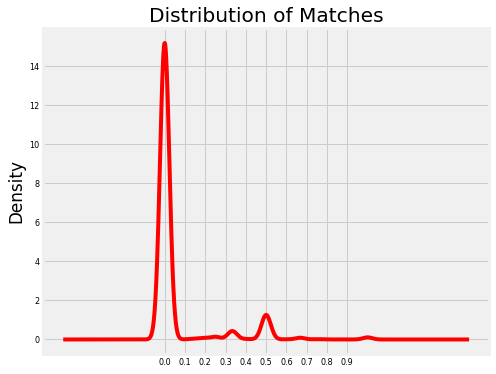

In [14]:
fig = plt.figure(figsize=(8, 6))
plt.style.use('fivethirtyeight')
jeopardy.answer_in_question.plot.kde(color = 'red', title = 'Distribution of Matches', fontsize = 8)
plt.xticks(np.arange(0, 1, 0.1))
plt.show()

In [15]:
# Find mean of column 'answer_in_question'
mean = jeopardy.answer_in_question.mean()
mean

0.059001965249777744

It can be seen that the mean matches of answers with questions are very low (approx 6%), so this may not be a very useful strategy on its own for studying or preparing for jeopardy. Most of the values in the plot as seen above are distributed around zero.

### Textual Analysis II - Analysing Recycled Questions
This relates to the second question in our textual analysis strategy i.e.:
- How often new questions are repeats of older questions?

We can answer this question by seeing how often complex words (> 6 characters) reoccur. Though, we can't completely answer this, because we only have about 10% of the full Jeopardy question dataset, but we can investigate it at least.

To do this, we will:

- Sort `jeopardy` in order of ascending air date.
- Maintain a set called `terms_used` that will be empty initially.
- Iterate through each row of `jeopardy`.
- Split `clean_question` into words, remove any word shorter than 6 characters, and check if each word occurs in `terms_used`.
If it does, increment a counter.
- Add each word to terms_used.

Above will enable us to check if the terms in questions have been used previously or not. Only looking at words with six or more characters enables us to filter out words like 'the' and 'than' etc., which are commonly used but don't tell us a lot about a question.

In [16]:
question_overlap = []
terms_used = set()
jeopardy = jeopardy.sort_values("Air Date")
for index, row in jeopardy.iterrows():
    split_question = row["clean_question"].split(" ")
    match_count = 0
    for word in split_question:
        if len(word) < 6:
            split_question.remove(word)
        if word in terms_used:
            match_count += 1
    terms_used.add(word)     
    if len(split_question) > 0:
            match_count /= len(split_question)
    question_overlap.append(match_count)      

jeopardy["question_overlap"] = question_overlap
jeopardy.tail()

,Show Number,Air Date,Round,Category,Value,Question,Answer,clean_question,clean_answer,clean_value,answer_in_question,question_overlap
1953,6294,2012-01-19,Double Jeopardy!,WEAPONS OF WORLD WAR II,$800,"Ships in the U.S. Navy's Casablanca class of ""...",aircraft carriers,ships in the us navys casablanca class of esco...,aircraft carriers,800,0.0,0.818182
1954,6294,2012-01-19,Double Jeopardy!,ACTING PRESIDENTS ON TV,$800,Dennis Haysbert & D.B. Woodside as David & Way...,24,dennis haysbert db woodside as david wayne pal...,24,800,0.0,0.333333
1955,6294,2012-01-19,Double Jeopardy!,4 N,$800,"""U"" know it means not deliberate; I'm sorry, t...",unintentional,u know it means not deliberate im sorry that s...,unintentional,800,0.0,1.125000
1945,6294,2012-01-19,Double Jeopardy!,AMERICAN HISTORY,$400,In December 1974 this former New York governor...,Rockefeller,in december 1974 this former new york governor...,rockefeller,400,0.0,0.875000
1922,6294,2012-01-19,Jeopardy!,THAT'S BUSINESS,$400,In 1997 Tyco International moved to this U.K. ...,Bermuda,in 1997 tyco international moved to this uk te...,bermuda,400,0.0,0.777778


In [17]:
jeopardy["question_overlap"].mean()

0.6895298136657917

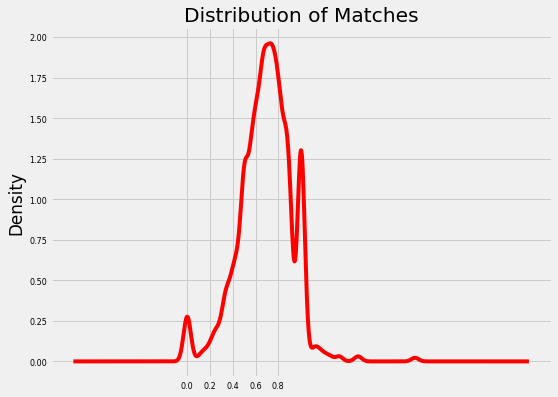

In [18]:
fig = plt.figure(figsize=(8, 6))
plt.style.use('fivethirtyeight')
jeopardy.question_overlap.plot.kde(color = 'red', title = 'Distribution of Matches', fontsize = 8)
plt.xticks(np.arange(0, 1, 0.2))
plt.show()

It can be seen that the mean matches of answers with questions are fairly high (approx 69%), so this may be a useful strategy  for studying or preparing for jeopardy. Most of the values in the plot as seen above are distributed around 0.7. However, this only looks at terms in new questions and old question; combination of words (phrases) are ignored. We need to investigate it further. 

### Low and High Value 

We can further refine this analysis by categorizing the questions as 'low-value' and 'high-value' and count the terms corresponding to high or low value questions using a chi-squared test. For now, we will focus on high-value questions.

We'll first narrow down the questions into two categories:

- Low value -- Any row where Value is less than 800.
- High value -- Any row where Value is greater than 800.

We'll then loop through each of the terms from the set `terms_used`, and:

- Find the number of low value questions the word occurs in.
- Find the number of high value questions the word occurs in.
- Find the percentage of questions the word occurs in.
- Based on the percentage of questions the word occurs in, find expected counts.
- Compute the chi squared value based on the expected counts and the observed counts for high and low value questions.
We can then find the words with the biggest differences in usage between high and low value questions, by selecting the words with the highest associated chi-squared values. Doing this for all of the words would take a very long time, so we'll just do it for a small sample now.

We will first create a function that takes in a row from a Dataframe, and:
If the `clean_value` column is greater than 800, assigns 1 to value.
Otherwise, assigns 0 to value.
Return `value`.
Apply function to the dataset `jeopardy`

In [19]:
def high_value(row):
    value = 0
    if row['clean_value'] >= 800:
        value = 1
    return value    
jeopardy['high_value'] = jeopardy.apply(high_value, axis=1)
jeopardy.high_value.sum()/len(jeopardy.high_value)

0.43572178608930445

From above it can be seen that about 44% questions are categorized as high-value. Since, we are interested in finding expected counts, we need to find total word count for questions categorized as high-value as well as low-value. We will write a function for that.  

In [20]:
def count_word(word):
    low_count = 0
    high_count = 0
    for index, row in jeopardy.iterrows():
        split_question = row['clean_question'].split(' ')
        if word in split_question:
            if row['high_value'] == 1:
                high_count += 1
            else:
                low_count +=1
    return high_count, low_count        
                           

We will work with a sample instead of the entire dataset in order to save computational resources, by picking up ten words at random from the set `terms_used` created earlier and applying the function `count_words`.

In [21]:
terms_used_list = list(terms_used) # Convert the set to list
comparison_terms = []
import random
for i in range(10):
    word =  random.choice(terms_used_list) # choice function picks up one random at a time word from list, tuple or string
    comparison_terms.append(word)
# Create a list to contain high_count and low_count values from comparison_terms
observed_expected = [] # Observed values
for word in comparison_terms:
    observed_expected.append(count_word(word))
print(comparison_terms)    
print(observed_expected)

['culdesac', 'basket', 'descended', 'special', 'mountains', 'identical', 'vixen', 'independencia', 'ages', 'graciea']
[(1, 0), (3, 3), (7, 2), (15, 19), (18, 18), (1, 4), (0, 1), (1, 0), (6, 6), (0, 1)]


### Chi-Squared Test
Finally we wil find the expected values and apply the chi-squared test and p-value for each word in the given sample of words.

In [25]:
# number of rows with high-value and low value
from scipy.stats import chisquare
high_value_count = jeopardy[jeopardy['high_value'] == 1].size 
low_value_count = jeopardy[jeopardy['high_value'] == 0].size 
chi_squared = []
for list in observed_expected:
    total = sum(list)
    total_prop = total/jeopardy.shape[0]
    high_value_exp = high_value_count * total_prop
    low_value_exp = low_value_count * total_prop
    
    observed = np.array([list[0], list[1]])
    expected = np.array([high_value_exp, low_value_exp])
    chi_squared.append(chisquare(f_obs = observed, f_exp = expected))
chi_squared    

[Power_divergenceResult(statistic=11.176541727723734, pvalue=0.0008283803174322232),
 Power_divergenceResult(statistic=66.4692943747559, pvalue=3.5538665717031723e-16),
 Power_divergenceResult(statistic=100.02175882373152, pvalue=1.5073197124996154e-23),
 Power_divergenceResult(statistic=376.61570111433804, pvalue=6.788672542236685e-84),
 Power_divergenceResult(statistic=398.8157662485355, pvalue=9.970763066104784e-89),
 Power_divergenceResult(statistic=55.47153614964141, pvalue=9.48221387660514e-14),
 Power_divergenceResult(statistic=11.136321188780204, pvalue=0.000846536134458528),
 Power_divergenceResult(statistic=11.176541727723734, pvalue=0.0008283803174322232),
 Power_divergenceResult(statistic=132.9385887495118, pvalue=9.325221511674942e-31),
 Power_divergenceResult(statistic=11.136321188780204, pvalue=0.000846536134458528)]

### Conclusion
We can draw following conclusions:
- In order to confirm or reject the alternative hypothesis that the quiz shows like 'Jeopardy' follow a set pattern, we considered 3 cases:
1. **Answers in Questions**: The test statistic in this case i.e. the mean was not found to be statistically significant.
2. **Recycled Questions**: The test statistic in tis case i.e. the mean had a high value but it was not tested for statistic significance because a number of other factors such as compound words, phrases and sequence of words also play an important part and mere repetition of words in questions may lead to misleading conclusions.
3. **High Value Questions**: The test statistic in this case i.e. **chi-square** could only be determined for a sample of 10 words out of a total of over 6500 unique words due to the requirements of high computational power. Above results appear promising with p_values in almost all cases(ten) less than 1%. But it is a very small sample and depends a great deal on the re-running of the code where the sample was drawn. A next run may yield entirely different results.  